# Customer Churn Prediction

Customer churn or customer attrition is a tendency of clients or customers to abandon a brand and stop being paying clients of a particular business or organization. The percentage of customers discontinuing using a company’s services or products during a specific period is called a customer churn rate. Several bad experiences (or just one) are enough, and a customer may quit. And if a large chunk of unsatisfied customers churn at a time interval, both material losses and damage to reputation would be enormous.

Using machine learning techniques, financial services companies use their customer data to identify behavior patterns of potential churners, classify these at-risk customers, and take appropriate actions to gain their trust and increase their retention rate. The task is to classify customers as churners or non-churners (binary classification) based on the organization’s historical data sources.

To perform the classification task, you can use machine learning classification algorithms like Logistic regression, Naive Bayes Classifier, Tree-based algorithms, Random Forest, etc. To increase efficiency, you can use advanced algorithms like XGBoost, LightGBM, or CatBoost. Use the accuracy metrics to compare the performance of the different models. You can use the Bank Customers Dataset for Churn to practice this project.

https://www.projectpro.io/article/projects-on-machine-learning-applications-in-finance/510#mcetoc_1gla0jmc415

#### Train and Evaluate the Neural Network Model

1. Train (fit) the neural network model. Use the training data and set 100 epochs.

2. Evaluate the model using the test data to determine its loss and accuracy.


## References:

[Keras Sequential model](https://keras.io/api/models/sequential/)

[Keras Dense module](https://keras.io/api/layers/core_layers/dense/)

[Keras evaluate](https://keras.io/api/models/model_training_apis/)

[SKLearn OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)


In [2]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

---

## Preprocess the data.

### Step 1: Read the `Churn_Modelling.csv` file from the Resources folder and create a DataFrame.

In [3]:
# Read the HR-Employee-Attrition.csv file from the Resources folder into a Pandas DataFrame
customer_df = pd.read_csv(Path("./Resources/Churn_Modelling.csv"))
customer_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Data cleaning: checking number of null

In [4]:
customer_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Understanding the dataset

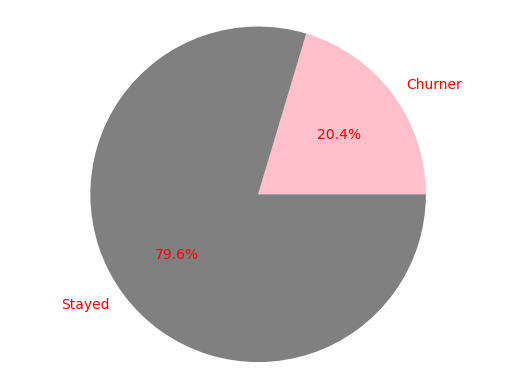

In [5]:
# plot the pie chart of customer retention rate
import matplotlib.pyplot as plt
Churner = customer_df[customer_df['Exited']==1].shape[0]
Stayed = customer_df[customer_df['Exited']==0].shape[0]
labels = ['Churner', 'Stayed']
sizes = [Churner, Stayed]
colors = ['pink', 'grey']
plt.pie(sizes, labels=labels,colors=colors, autopct='%1.1f%%')
plt.axis('equal')
for label in plt.gcf().get_axes()[0].texts:
    label.set_color('red')
plt.show()


### Step 2: Review the resulting DataFrame. Check the data type associated with each column to identify categorical and non-categorical variables.

> **Hint** Recall that categorical variables have an `object` data type.


In [6]:
# Review the DataFrame
display(customer_df.head())

# Review the data types associated with the columns
display(customer_df.dtypes)
display(customer_df.shape)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

(10000, 14)

### Step 3: Create a list of categorical variables.

In [7]:
# Create a list of categorical variables 
# Removing the 'Surname' column as this has no bearing on the outcome
categorical_variables = list(customer_df.dtypes[customer_df.dtypes == "object"].index)
categorical_variables = ['Geography', 'Gender']

In [8]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Encode categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(customer_df[categorical_variables])

# Create a DataFrame with the encoded variables
# The column names should match those of the encoded variables
encoded_df = pd.DataFrame(encoded_data,columns = enc.get_feature_names_out(categorical_variables))
encoded_df

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...
9995,1.0,0.0,0.0,0.0,1.0
9996,1.0,0.0,0.0,0.0,1.0
9997,1.0,0.0,0.0,1.0,0.0
9998,0.0,1.0,0.0,0.0,1.0


In [9]:
categorical_variables = encoded_df.columns
categorical_variables





Index(['Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [10]:
# Create a DataFrame with the columnns containing numerical variables from the original dataset
numerical_variables_df = customer_df.drop(columns = ['Surname','Geography', 'Gender'])

# Using the Pandas concat function, combine the DataFrames the contain the encoded categorical data and the numerical data
attrition_df = pd.concat([numerical_variables_df,encoded_df],axis=1)

# Reveiw the DataFrame
attrition_df.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0


In [11]:
# Define the target set y using the Attrition_Yes column
y = attrition_df["Exited"]


# Define features set X by selecting all columns but Attrition_Yes and Attrition_No
X = attrition_df.drop(columns=["Exited"])

# Review the features DataFrameb
display(y.shape)
display(X.shape)

(10000,)

(10000, 15)

# Searching for Correlations

In [12]:
corr_matrix = attrition_df.corr().abs()
corr_matrix = corr_matrix.unstack()
strong_corr = corr_matrix.sort_values(kind="quicksort")
print(strong_corr)

RowNumber          Geography_Germany    0.000044
Geography_Germany  RowNumber            0.000044
Tenure             Geography_Germany    0.000567
Geography_Germany  Tenure               0.000567
RowNumber          HasCrCard            0.000599
                                          ...   
Age                Age                  1.000000
CreditScore        CreditScore          1.000000
CustomerId         CustomerId           1.000000
Gender_Female      Gender_Female        1.000000
Gender_Male        Gender_Male          1.000000
Length: 256, dtype: float64


# Visualising the Dataset

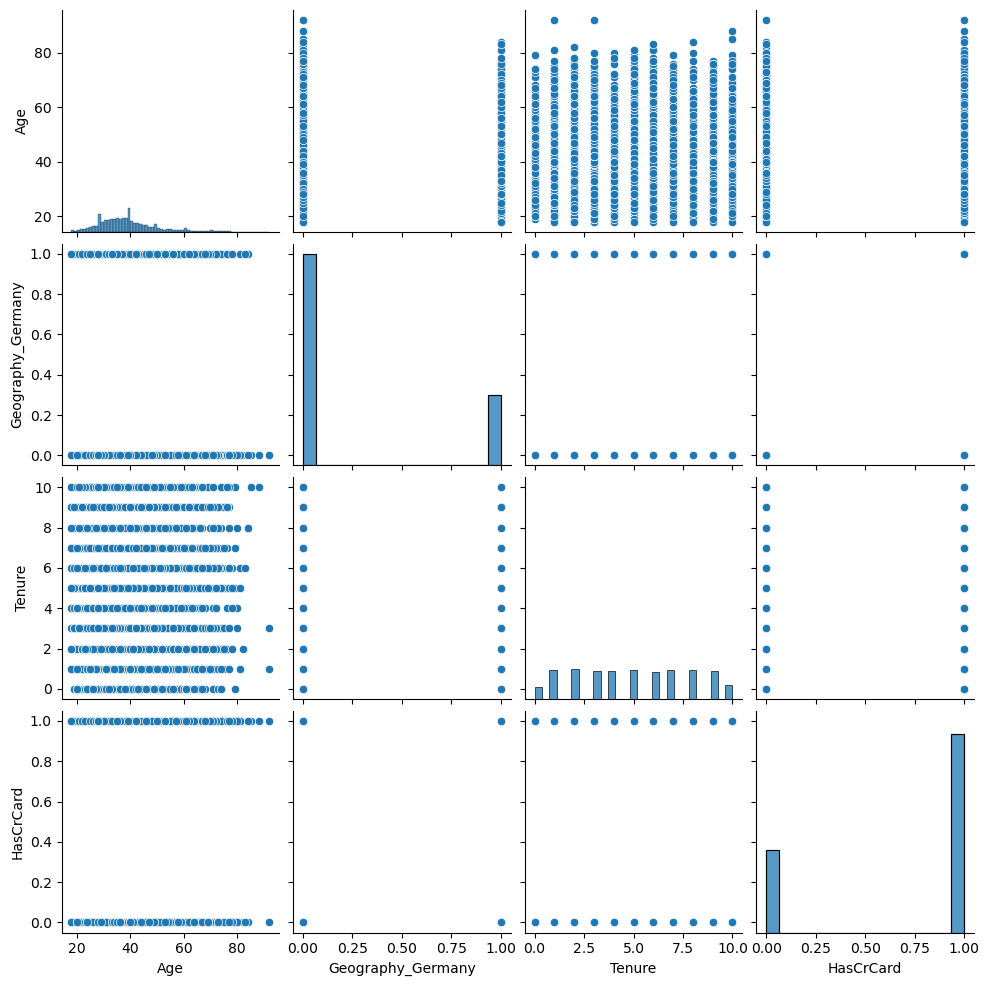

In [13]:
import seaborn as sns
columns = ["Age", "Geography_Germany","Tenure","HasCrCard"]
sns.pairplot(attrition_df,vars=columns)

# Create the training, validation and testing sets using the `train_test_split` function from scikit-learn.

In [14]:
# Split the data into training and testing datasets
# We can use the train_test_split to first make the split on the original dataset. 
# Then, to get the validation set, we can apply the same function to the train set to get the validation set.

# https://towardsdatascience.com/how-to-split-data-into-three-sets-train-validation-and-test-and-why-e50d22d3e54c

# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

# Now since we want the validation and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
validation_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, train_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)



(8000, 15)
(8000,)
(1000, 15)
(1000,)
(1000, 15)
(1000,)


(None, None)

In [15]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_valid_scaled = X_scaler.transform(X_valid)
X_test_scaled = X_scaler.transform(X_test)

---

## Create a Neural Network Model to Predict Employee Attrition

### Step 1: Use the optimization techniques presented in this lesson to create a deep neural network model with two hidden layers.

In [16]:
# Define the the number of inputs (features) to the model (i.e. 55 = columns of X)
number_input_features = len(X_train.iloc[0])

# Define the number of hidden nodes for the first hidden layer
# Use the mean of the number of input features plus the number of output nurons
# Use the Python floor division (//) to return the quotent
hidden_nodes_layer1 =  (number_input_features + 1) // 2 

# Define the number of hidden nodes for the second hidden layer
# Use the mean of the number of hidden nodes in the first hidden layer plus the number of output nurons
# Use the Python floor division (//) to return the quotent
hidden_nodes_layer2 = (hidden_nodes_layer1 + 1) // 2

# Create the Sequential model instance
nn = Sequential()

# Add the first hidden layer specifying the number of inputs, the number of hidden nodes, and the activation function
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer specifying the number of hidden nodes and the activation function
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
# This model will predict a binary output. So, add an output layer with one neuron, and use the `sigmoid` activation function.
nn.add(Dense(units=1, activation="sigmoid"))

# Display the Sequential model summary
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 128       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


### Step 2: Compile the model. Use the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` metric.

In [17]:
# Compile the Sequential model
nn.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.TruePositives(name="tp"),
        tf.keras.metrics.TrueNegatives(name="tn"),
        tf.keras.metrics.FalsePositives(name="fp"),
        tf.keras.metrics.FalseNegatives(name="fn"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc"),
    ],
)

### Step 3: Train (fit) the neural network model. Use the training data and set 100 epochs.


In [18]:
# Training the model
batch_size = 1000
epochs = 50
training_history = nn.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_valid_scaled, y_valid),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
)

Epoch 1/100
250/250 [==============================] - 12s 16ms/step - loss: 0.5778 - accuracy: 0.7272
Epoch 2/100
250/250 [==============================] - 4s 15ms/step - loss: 0.4746 - accuracy: 0.7921
Epoch 3/100
250/250 [==============================] - 4s 15ms/step - loss: 0.4470 - accuracy: 0.7925
Epoch 4/100
250/250 [==============================] - 4s 15ms/step - loss: 0.4373 - accuracy: 0.7934
Epoch 5/100
250/250 [==============================] - 3s 13ms/step - loss: 0.4300 - accuracy: 0.8021
Epoch 6/100
250/250 [==============================] - 3s 13ms/step - loss: 0.4215 - accuracy: 0.8100
Epoch 7/100
250/250 [==============================] - 3s 13ms/step - loss: 0.4095 - accuracy: 0.8227
Epoch 8/100
250/250 [==============================] - 3s 13ms/step - loss: 0.3932 - accuracy: 0.8399
Epoch 9/100
250/250 [==============================] - 3s 10ms/step - loss: 0.3779 - accuracy: 0.8490
Epoch 10/100
250/250 [==============================] - 3s 13ms/step - loss: 0.36

In [ ]:
# Predict values using the testing data
nn_train_predictions = nn.predict(X_train_scaled, batch_size=1000)
nn_test_predictions = nn.predict(X_test_scaled, batch_size=1000)

In [ ]:
# Plotting Recall metric
recall_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["recall"],
        "Val": training_history.history["val_recall"],
    }
)
recall_df.set_index("Epoch", inplace=True)
recall_df.plot(title="Recall")

### Step 4: Evaluate the model using the test data to determine its loss and accuracy.

In [45]:
# Predict classes using testing data
y_predict_classes = (nn.predict(X_test_scaled) > 0.5).astype("int32")
# Display classification report
print(classification_report(y_predict_classes, y_test))



32/32 - 0s - loss: 0.3296 - accuracy: 0.8660 - 384ms/epoch - 12ms/step
nn_Loss: 0.3295937478542328, Accuracy: 0.8659999966621399


# Modelling using Logistic Regression with the Original Data

In [20]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

import warnings
warnings.filterwarnings('ignore')

---

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [21]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier
# Fit the model using training data
# YOUR CODE HERE!
classifier.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [22]:
# Make a prediction using the validation data
# YOUR CODE HERE!
predictions = classifier.predict(X_valid_scaled)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [23]:
# Print the balanced_accuracy score of the model
# YOUR CODE HERE!
from sklearn.metrics import balanced_accuracy_score
# Display the accuracy score for the test dataset.
balanced_accuracy_score(y_valid, predictions)

0.6001794399584455

In [24]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, predictions)

array([[784,  35],
       [137,  44]], dtype=int64)

In [33]:
# Print the classification report for the model
# YOUR CODE HERE!
from sklearn.metrics import classification_report
target_names = ["Stayed-0", "Churner-1"]
print(classification_report(y_valid, predictions, target_names=target_names))

              precision    recall  f1-score   support

    Stayed-0       0.85      0.96      0.90       819
   Churner-1       0.56      0.24      0.34       181

    accuracy                           0.83      1000
   macro avg       0.70      0.60      0.62      1000
weighted avg       0.80      0.83      0.80      1000



---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [26]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!
random_oversampler = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
# YOUR CODE HERE!
X_resampled, y_resampled = random_oversampler.fit_resample(X_train_scaled, y_train)



In [27]:
# Count the distinct values of the resampled labels data
# YOUR CODE HERE!
y_resampled.value_counts()

0    6335
1    6335
Name: Exited, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [28]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!
resampled_classifier = LogisticRegression( random_state=1)
resampled_classifier
# Fit the model using the resampled training data
# YOUR CODE HERE!
resampled_classifier.fit(X_resampled, y_resampled)
# Make a prediction using the validation data
# YOUR CODE HERE!
resampled_predictions = resampled_classifier.predict(X_valid_scaled)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [29]:
# Print the balanced_accuracy score of the model 
# YOUR CODE HERE!
balanced_accuracy_score(y_valid, resampled_predictions)

0.6975020068942721

In [30]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!
confusion_matrix(y_valid, resampled_predictions)

array([[595, 224],
       [ 60, 121]], dtype=int64)

In [32]:
# Print the classification report for the model
# YOUR CODE HERE!
from imblearn.metrics import classification_report_imbalanced

target_names = ["Stayed-0", "Churner-1"]
print(classification_report_imbalanced(y_valid, resampled_predictions, target_names=target_names))

                   pre       rec       spe        f1       geo       iba       sup

   Stayed-0       0.91      0.73      0.67      0.81      0.70      0.49       819
  Churner-1       0.35      0.67      0.73      0.46      0.70      0.48       181

avg / total       0.81      0.72      0.68      0.74      0.70      0.49      1000



---

# Modelling using Random Forest 

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [35]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)



In [36]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)


### Making Predictions Using the Decsion Tree Model

In [37]:
# Making predictions using the validation data
predictions = rf_model.predict(X_valid_scaled)


### Model Evaluation

In [38]:
# Calculating the confusion matrix
cm = confusion_matrix(y_valid, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_valid, predictions)



In [39]:
# Displaying results
#print("Confusion Matrix")
#display(cm_df)
#print(f"Accuracy Score : {acc_score}")

print("Classification Report")
target_names = ["Stayed-0", "Churner-1"]
print(classification_report(y_test, predictions, target_names=target_names))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,785,34
Actual 1,109,72


Accuracy Score : 0.857
Classification Report
              precision    recall  f1-score   support

    Stayed-0       0.81      0.89      0.85       809
   Churner-1       0.18      0.10      0.13       191

    accuracy                           0.74      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.69      0.74      0.71      1000



## Feature Importance

In [40]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_



In [41]:
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)



[(0.2079409457308719, 'Age'),
 (0.11466836236738183, 'NumOfProducts'),
 (0.10357752527134628, 'Balance'),
 (0.10279973895485556, 'CreditScore'),
 (0.10115303091258186, 'CustomerId'),
 (0.10104309888477747, 'EstimatedSalary'),
 (0.09900151213309824, 'RowNumber'),
 (0.06121387457936567, 'Tenure'),
 (0.038235370923118295, 'IsActiveMember'),
 (0.019897219422293843, 'Geography_Germany'),
 (0.014465462740093166, 'HasCrCard'),
 (0.010169038296419653, 'Geography_France'),
 (0.008788470575113389, 'Gender_Female'),
 (0.00858017553599137, 'Gender_Male'),
 (0.008466173672691467, 'Geography_Spain')]

---

# Modelling using K-Nearest Neighbors   

In [152]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the model with k = 3 neighbors
model = KNeighborsClassifier(n_neighbors=3)

In [153]:
# Train the model
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [154]:
# Create predictions
y_pred = model.predict(X_valid_scaled)

# Review the predictions
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [155]:
# Print confusion matrix
confusion_matrix(y_pred,y_valid)

array([[748, 124],
       [ 68,  60]], dtype=int64)

In [156]:
# Print classification report
print(classification_report(y_pred,y_valid, target_names=target_names))

              precision    recall  f1-score   support

    Stayed-0       0.92      0.86      0.89       872
    Exited-1       0.33      0.47      0.38       128

    accuracy                           0.81      1000
   macro avg       0.62      0.66      0.64      1000
weighted avg       0.84      0.81      0.82      1000



---

# Modelling using XGBoost

In [157]:
# Make sure to intall the following into your environment
# conda install -c conda-forge xgboost

from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance

In [158]:
model = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')

In [159]:
model.fit(X_train_scaled, y_train)

[19:19:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=1, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=2, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [160]:
# Create predictions
y_pred = model.predict(X_valid_scaled)

# Review the predictions
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [161]:
# Print confusion matrix
confusion_matrix(y_pred,y_valid)

array([[785, 118],
       [ 31,  66]], dtype=int64)

In [162]:
# Print classification report
print(classification_report(y_pred,y_valid, target_names=target_names))

              precision    recall  f1-score   support

    Stayed-0       0.96      0.87      0.91       903
    Exited-1       0.36      0.68      0.47        97

    accuracy                           0.85      1000
   macro avg       0.66      0.77      0.69      1000
weighted avg       0.90      0.85      0.87      1000



---

# Modelling using LightGBM
### pip install lightgbm
'''
The main features of the LGBM model are as follows :

Higher accuracy and a faster training speed.

Low memory utilization

Comparatively better accuracy than other boosting algorithms and handles overfitting much better while working with smaller datasets.

Parallel Learning support.

Compatible with both small and large datasets
'''

In [46]:
import lightgbm as lgb


In [47]:
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's binary_logloss: 0.326165	valid_0's binary_logloss: 0.310876
[40]	training's binary_logloss: 0.285378	valid_0's binary_logloss: 0.292556
[60]	training's binary_logloss: 0.256761	valid_0's binary_logloss: 0.291333
[80]	training's binary_logloss: 0.234244	valid_0's binary_logloss: 0.289836
[100]	training's binary_logloss: 0.215841	valid_0's binary_logloss: 0.290277


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [49]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.9154
Testing accuracy 0.8920


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

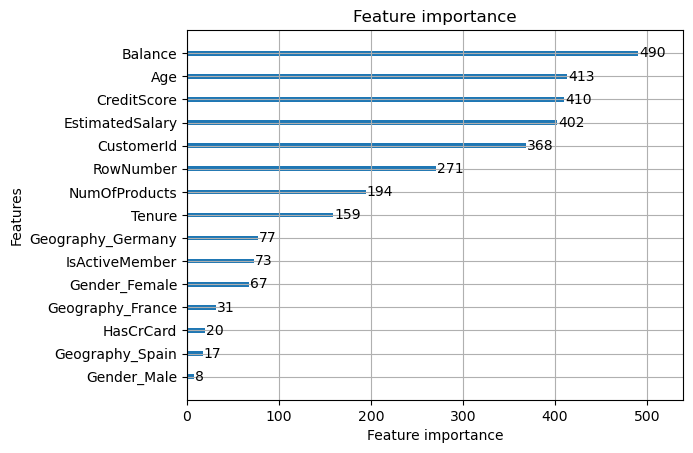

In [50]:
lgb.plot_importance(model)

---

# Modelling using 
### pip install catboost
### pip install ipywidgets


In [ ]:
# https://www.kaggle.com/code/prashant111/catboost-classifier-in-python
